<a href="https://colab.research.google.com/github/macrodatascience/100DaysOfCode/blob/main/Day_6_Project_K_means_Clustering_DataQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read a file

gdrive_path = '/content/gdrive/MyDrive/Colab Notebooks/'
count=0
with open(f'{gdrive_path}teams.csv', 'r') as file:
  for line in file:
    count+=1
  print(count)

2015


In [ ]:
# Write a file

with open(f'{gdrive_path}hello.txt', 'w') as file:
  file.write("Hello Google Drive!")

In [ ]:
!cat /content/gdrive/MyDrive/Colab\ Notebooks/hello.txt

Hello Google Drive!

In [3]:
import pandas as pd
import numpy as np

players = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/players_22.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
players.shape

(19239, 110)

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [8]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset = features)
players.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url           0
club_flag_url           0
nation_logo_url     18467
nation_flag_url         0
Length: 110, dtype: int64

In [9]:
data = players[features].copy()
data 

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [10]:
# 1. Scale the data 
# 2. Initialize Random centroids
# 3. Label each data point
# 4. Update centroids
# 5. Repeat steps 3 and 4 until centroids stop changing

In [13]:
# 1. Scale the data using min-max scaler  (variance in the data is preserved)

data = ((data - data.min()) / (data.max() - data.min()))*9+1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [45]:
# 2. Initiatlize Random centroids

def random_centroids(data, k):
    centroids = [] 
    for i in range(k):
      centroid = data.apply(lambda x: float(x.sample()))
      centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [50]:
centroids = random_centroids(data, 5)
centroids         # each column is a cluster -- 0, 1, 2, 3, 4  each row is the feature

,0,1,2,3,4
overall,7.260870,4.326087,2.956522,4.717391,5.304348
potential,4.130435,3.739130,6.673913,3.543478,5.891304
wage_eur,1.115880,1.064378,1.090129,1.914163,1.914163
value_eur,1.194437,1.010253,1.007469,1.026259,1.078452
age,3.666667,4.333333,4.000000,3.666667,2.666667


In [35]:
import random
count=0
for i in range(1000):
  a = random.randint(0,10)
  if a==1:
    count+=1
print(count)


100


In [42]:
data.sample()

,overall,potential,wage_eur,value_eur,age
10616,4.521739,5.891304,1.012876,1.069173,3.0


In [43]:
data.apply(lambda x: float(x.sample()))

overall      4.913043
potential    4.913043
wage_eur     1.012876
value_eur    1.012341
age          2.333333
dtype: float64

In [59]:
# distance metric

np.sqrt(((data - centroids.iloc[:, 0])**2))

,overall,potential,wage_eur,value_eur,age
0,2.739130,5.478261,8.111588,3.423870,3.333333
1,2.543478,5.282609,6.824034,5.349217,2.666667
2,2.347826,5.086957,6.824034,1.892871,4.000000
3,2.347826,5.086957,6.824034,5.789959,1.666667
4,2.347826,5.086957,8.884120,5.627581,2.000000
...,...,...,...,...,...
19234,6.260870,2.543478,0.103004,0.191607,0.666667
19235,6.260870,1.173913,0.115880,0.189751,1.666667
19236,6.260870,1.956522,0.115880,0.190215,1.000000
19237,6.260870,0.978261,0.115880,0.189751,1.666667


In [62]:
centroids

,0,1,2,3,4
overall,7.260870,4.326087,2.956522,4.717391,5.304348
potential,4.130435,3.739130,6.673913,3.543478,5.891304
wage_eur,1.115880,1.064378,1.090129,1.914163,1.914163
value_eur,1.194437,1.010253,1.007469,1.026259,1.078452
age,3.666667,4.333333,4.000000,3.666667,2.666667


In [52]:
centroids.iloc[:,0]

overall      7.260870
potential    4.130435
wage_eur     1.115880
value_eur    1.194437
age          3.666667
Name: 0, dtype: float64

In [66]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [69]:
labels = get_labels(data, centroids)

In [70]:
labels.shape

(19165,)

In [71]:
labels.value_counts()

1    8848
4    7072
2    1731
0    1393
3     121
dtype: int64

In [72]:
## update the players based on who is in the cluser
## take the geometric mean of each feature 
## geometric mean is the mean of the centre of points in the euclidean space
## geometric mean gives you the centre of each cluster


In [74]:

# geometric mean 
np.exp(np.log(data).mean())

overall      4.453679
potential    5.179908
wage_eur     1.169680
value_eur    1.105830
age          3.748522
dtype: float64

In [80]:
data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean()))   
## for each label (cluster assignments), we are calculating the geometric mean of each feature (which is the centre of cluster or cluster centroid)

,overall,potential,wage_eur,value_eur,age
0,6.598530,6.214690,1.559061,1.282400,5.812002
1,4.159047,4.309461,1.073213,1.032052,4.695787
2,2.708859,5.349052,1.020585,1.017445,2.016970
3,2.972817,4.193534,1.018305,1.019130,2.124570
4,5.106658,6.264121,1.275788,1.196728,3.048058


In [81]:
data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T 

,0,1,2,3,4
overall,6.598530,4.159047,2.708859,2.972817,5.106658
potential,6.214690,4.309461,5.349052,4.193534,6.264121
wage_eur,1.559061,1.073213,1.020585,1.018305,1.275788
value_eur,1.282400,1.032052,1.017445,1.019130,1.196728
age,5.812002,4.695787,2.016970,2.124570,3.048058


In [96]:
def new_centroids(data, labels, k=90):
  return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T 

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [98]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(data) # initializing a PCA model we want to convert the data into 2 columns
  centroids_2d = pca.transform(centroids.T) # PCA model expects the data where the columns are features, and the rows are data points
  clear_output(wait = True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

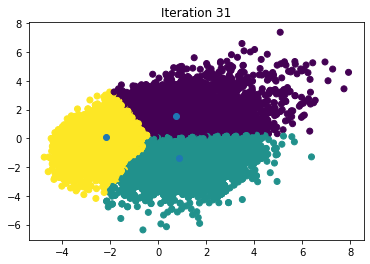

In [104]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1 

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels)
  plot_clusters(data, labels, centroids, iteration)
  iteration +=1

In [105]:
centroids

,0,1,2
overall,5.806043,4.784633,3.206838
potential,6.497993,4.506962,4.928473
wage_eur,1.420001,1.118904,1.028505
value_eur,1.285501,1.044980,1.026614
age,3.596161,5.472247,2.518708


In [106]:
players[labels==2]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
7025,234018,https://sofifa.com/player/234018/sandeiro-luan...,Sandeiro Leal,Sandeiro Luan Leal Neto,CAM,68,68,1400000.0,7000.0,21,...,54+2,54+2,54+2,56+2,15+2,https://cdn.sofifa.net/players/234/018/22_120.png,https://cdn.sofifa.net/teams/111041/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8028,230187,https://sofifa.com/player/230187/narcisso-elia...,Narcisso Mau,Narcisso Elias Mau de Faria,"LB, RB",67,67,1100000.0,4000.0,21,...,64+2,64+2,64+2,65+2,19+2,https://cdn.sofifa.net/players/230/187/22_120.png,https://cdn.sofifa.net/teams/112476/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8029,230192,https://sofifa.com/player/230192/joao-rodolfo-...,Botelhinonsa,João Rodolfo Botelho Maia,RB,67,67,1100000.0,4000.0,21,...,67,67,67,65+2,17+2,https://cdn.sofifa.net/players/230/192/22_120.png,https://cdn.sofifa.net/teams/1039/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8030,230200,https://sofifa.com/player/230200/edenildo-eloi...,Edenildo Lagoas,Edenildo Eloi Lagoas Regalo,"RB, CB",67,67,1100000.0,3000.0,21,...,66+1,66+1,66+1,65+2,20+2,https://cdn.sofifa.net/players/230/200/22_120.png,https://cdn.sofifa.net/teams/111059/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8040,230485,https://sofifa.com/player/230485/dener-adao-ro...,Dener Rolim,Dener Adão Rolim Leal,"CAM, RM",67,67,1200000.0,4000.0,21,...,43+2,43+2,43+2,46+2,18+2,https://cdn.sofifa.net/players/230/485/22_120.png,https://cdn.sofifa.net/teams/1598/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [107]:
players[labels==0]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,261025,https://sofifa.com/player/261025/dane-scarlett...,D. Scarlett,Dane Pharrell Scarlett,ST,63,86,1500000.0,3000.0,17,...,36+2,36+2,36+2,39+2,15+2,https://cdn.sofifa.net/players/261/025/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
13256,261374,https://sofifa.com/player/261374/lewis-bate/22...,L. Bate,Lewis Bate,"CM, CDM",63,83,1300000.0,5000.0,18,...,56+2,56+2,56+2,60+2,14+2,https://cdn.sofifa.net/players/261/374/22_120.png,https://cdn.sofifa.net/teams/8/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
13351,264110,https://sofifa.com/player/264110/javier-llabre...,Llabrés,Javier Llabrés Exposito,"LM, LW, RW",63,81,1200000.0,3000.0,19,...,38+2,38+2,38+2,48+2,16+2,https://cdn.sofifa.net/players/264/110/22_120.png,https://cdn.sofifa.net/teams/453/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
14144,258171,https://sofifa.com/player/258171/hannibal-mejb...,H. Mejbri,Hannibal Mejbri,"CAM, CM",62,84,1300000.0,6000.0,18,...,54+2,54+2,54+2,58+2,14+2,https://cdn.sofifa.net/players/258/171/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/tn.png


In [108]:
players[labels==1]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
199,120533,https://sofifa.com/player/120533/kepler-lavera...,Pepe,Kléper Laveran de Lima Ferreira,CB,82,82,5500000.0,14000.0,38,...,82,82,82,76+3,18+3,https://cdn.sofifa.net/players/120/533/22_120.png,https://cdn.sofifa.net/teams/236/60.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
284,45186,https://sofifa.com/player/45186/joaquin-sanche...,Joaquín,Joaquín Sánchez Rodríguez,"RM, LM",81,81,8500000.0,23000.0,39,...,53+2,53+2,53+2,58+2,19+2,https://cdn.sofifa.net/players/045/186/22_120.png,https://cdn.sofifa.net/teams/449/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
292,171791,https://sofifa.com/player/171791/jose-miguel-d...,José Fonte,José Miguel da Rocha Fonte,CB,81,81,4600000.0,30000.0,37,...,80+1,80+1,80+1,69+3,17+3,https://cdn.sofifa.net/players/171/791/22_120.png,https://cdn.sofifa.net/teams/65/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/pt.png
388,1179,https://sofifa.com/player/1179/gianluigi-buffo...,G. Buffon,Gianluigi Buffon,GK,80,80,2300000.0,18000.0,43,...,28+3,28+3,28+3,26+3,78+2,https://cdn.sofifa.net/players/001/179/22_120.png,https://cdn.sofifa.net/teams/50/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/it.png
509,41,https://sofifa.com/player/41/andres-iniesta-lu...,Iniesta,Andrés Iniesta Luján,"CM, CAM",79,79,5500000.0,10000.0,37,...,61+3,61+3,61+3,63+3,16+3,https://cdn.sofifa.net/players/000/041/22_120.png,https://cdn.sofifa.net/teams/101146/60.png,https://cdn.sofifa.net/flags/jp.png,NaN,https://cdn.sofifa.net/flags/es.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18890,248273,https://sofifa.com/player/248273/semboi-haokip...,S. Haokip,Semboi Haokip,ST,51,51,60000.0,500.0,28,...,33+2,33+2,33+2,33+2,15+2,https://cdn.sofifa.net/players/248/273/22_120.png,https://cdn.sofifa.net/teams/111629/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
18971,263055,https://sofifa.com/player/263055/lalkhawpuimaw...,Lalkhawpuimawia,Lalkhawpuimawia Lalkhawpuimawia,"ST, LM",51,51,60000.0,500.0,29,...,32+2,32+2,32+2,36+2,14+2,https://cdn.sofifa.net/players/263/055/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
19032,257936,https://sofifa.com/player/257936/yue-song/220002,Song Yue,宋岳,"CB, CM, CDM",50,50,40000.0,2000.0,29,...,50,50,50,49+1,11+2,https://cdn.sofifa.net/players/257/936/22_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19100,157190,https://sofifa.com/player/157190/john-russell/...,J. Russell,John Russell,"CM, CDM",49,49,15000.0,500.0,36,...,50-1,50-1,50-1,46+2,14+2,https://cdn.sofifa.net/players/157/190/22_120.png,https://cdn.sofifa.net/teams/563/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [121]:
## using sklearn

from sklearn.cluster import KMeans

In [125]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [126]:
centroids_sk = kmeans.cluster_centers_

In [127]:
pd.DataFrame(centroids_sk, columns = features).T

,0,1,2
overall,6.231096,3.599859,4.800991
potential,6.623746,5.205869,4.503972
wage_eur,1.657093,1.039947,1.112902
value_eur,1.413686,1.035792,1.040011
age,4.139879,2.712386,5.609167


In [120]:
centroids

,0,1,2
overall,5.806043,4.784633,3.206838
potential,6.497993,4.506962,4.928473
wage_eur,1.420001,1.118904,1.028505
value_eur,1.285501,1.044980,1.026614
age,3.596161,5.472247,2.518708
